<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

# A more difficult notebook in python  <a name="c"></a>

# $B_s^{+}$ decays: finding the $B_{s}^{+}$ meson mass!

### For an introduction to the ideas behind $B_{s}^{+}$ finding, click <a href="Events/ZPath.pdf"> here</a>.

**The following analysis is searching for events where the [$B_{s}^{0}$](https://en.wikipedia.org/wiki/Strange_B_meson) meson decays to two leptons of the same flavour and opposite charge.**

The $B_{s}^{0}$ meson is composed of a $b$ quark and an $\bar{s}$ antiquark (as we've seen in the Introduction to Particle Physics notebook). 

As you might recall, leptons can be either electrons or muons, or their antiparticles. **Flavour** just means whether a particle is an (anti)electron or a (anti)muon. We know the $B_{s}^{0}$ meson has charge zero, so, to conserve charge, the two leptons to which a single $B_{s}^{0}$ decays must have **opposite charges**. In our case, we are interested in the decay of $B_{s}^{0}$ to two muons ($B_{s}^{0} \to \mu^{-} \mu^{+}$).

We also say that muon number must be conserved in this reaction.

* Muons and antimuons have $+1$ and $-1$ respectively as their muon numbers, and have zero electron number.
* $B_{s}^{0}$ has zero electron number and muon number.

Therefore, we see that if the $B_{s}^{0}$ decays to two muons, **they must be the same flavour**. 

Now that we know about 4-vectors and we know how to manipulate them, we will look at the $B_{s}^{0}$ decay to two muons but firstly, we need to think about how we talk about decays in particle physcis.

**Contents:**
- [Decays](#1.)
- [Cuts](#2.)
- [Over to you! To four leptons](#3.)
- [Real experiments](#4.)
- [Extension exercises](#5.)

---

## Decays <a name="1."></a>

Let's start with understanding the idea of a decay process.

We want to find $B_{s}^{0}$ mesons, but they don't live long enough to actually see with the detector itself. Instead, we have to **reconstruct** them from their decay products. We don't particularly mind where the $B_{s}^{0}$s themselves come from. All you need to know here is that each time the LHC smashes two protons together, they produce lots and lots of particles, some of which are $B_{s}^{0}$s.


From theory, we know that there are several decay routes as you can see in [here](https://pdglive.lbl.gov/Particle.action?init=0&node=S086&home=MXXX046) but today we are interested in the particular decay route $B_{s}^{0} \to \mu^{-} \mu^{+}$.


### To two muons

In this option, a random $B_{s}^{0}$ emerges from the collision aftermath in the LHC (we don't care how) can decay directly to two muons with opposite charge. This means a muon and an antimuon. The decay happens at the vertex below, marked by a dot. We denote a lepton by the letter $\mu^{+}$. Conventionally, antiparticles are shown with a bar on top, so an antilepton is $\mu^{-}$.

<CENTER><img src="./images/Z_to_ll.png" style="width:30%"></CENTER>

*Using what you know above, write down the equation of conservation of the energy-momentum four-vector for the above decay.*

The LHCb detector can measure the momentum and energy of muons coming out of decays, and you can access that information quite simply. It also measures the charge and flavour of each lepton (whether its a muon/antimuon).

We mentioned earlier that each smash makes lots of particles. That's true - in fact, it makes so many that we can't actually store all the records of what happened, even on some of the biggest data storage facilities in the world. 

Instead, we use what is called a trigger. The trigger here was us seeing **exactly one high energy lepton** and **one jet with a large radius** (don't worry about what that is for now), so all of our data will contain at least those two things, as well as a bunch of other particles.


Next we have to open the data that we want to analyze. As described earlier, the data is stored in a *.root file. We can use a python library called uproot to access the data. Below is an example of how to open a *.root file using uproot

In [6]:
## 2 lepton file
f = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root") ## 13 TeV sam

We can inspect the contents of a file by using the method keys()

In [7]:
f.keys()

['mini;1']

We see that we have an object called 'mini'. We can obtain information about the object in the file and its type by using the method classnames()

In [8]:
f.classnames()

{'mini;1': 'TTree'}

We see that the object called mini is a TTree type. A TTree is simply columns of data stored in the .root format. Each column of data can represent a different physical quantity of a particle. For instance, its charge, energy, momentum etc.

Now we know what data the file contains, in future we can quickly access that data. We want to access the mini data. This can be done by executing the command below


In [9]:
events = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root:mini")

Let's look at contents of the TTree. Essentially all the columns in the TTree called mini

In [10]:
events.keys()

['runNumber',
 'eventNumber',
 'channelNumber',
 'mcWeight',
 'scaleFactor_PILEUP',
 'scaleFactor_ELE',
 'scaleFactor_MUON',
 'scaleFactor_PHOTON',
 'scaleFactor_TAU',
 'scaleFactor_BTAG',
 'scaleFactor_LepTRIGGER',
 'scaleFactor_PhotonTRIGGER',
 'trigE',
 'trigM',
 'trigP',
 'lep_n',
 'lep_truthMatched',
 'lep_trigMatched',
 'lep_pt',
 'lep_eta',
 'lep_phi',
 'lep_E',
 'lep_z0',
 'lep_charge',
 'lep_type',
 'lep_isTightID',
 'lep_ptcone30',
 'lep_etcone20',
 'lep_trackd0pvunbiased',
 'lep_tracksigd0pvunbiased',
 'met_et',
 'met_phi',
 'jet_n',
 'jet_pt',
 'jet_eta',
 'jet_phi',
 'jet_E',
 'jet_jvt',
 'jet_trueflav',
 'jet_truthMatched',
 'jet_MV2c10',
 'photon_n',
 'photon_truthMatched',
 'photon_trigMatched',
 'photon_pt',
 'photon_eta',
 'photon_phi',
 'photon_E',
 'photon_isTightID',
 'photon_ptcone30',
 'photon_etcone20',
 'photon_convType',
 'tau_n',
 'tau_pt',
 'tau_eta',
 'tau_phi',
 'tau_E',
 'tau_isTightID',
 'tau_truthMatched',
 'tau_trigMatched',
 'tau_nTracks',
 'tau_BDTid

We see columns such as lep_pt and lep_E. This is the transverse momentum and energy respectively of leptons. We can use the .arrays method to access events with just the columns we specify.

In [12]:
sel_events = events.arrays(["lep_n", "lep_charge", "lep_type", "lep_pt", "lep_eta", "lep_phi", "lep_E"])

We want to run over all the data and reconstruct the $Z^0$ boson mass. To do this we will access events using the arrays method again. Let's look at doing this.

First we define a histogram. To do this we can import the python hist library. Once we have done that we can define a histogram. Its name is hist and the x axis is named mass [GeV]. The three initial arguments indicate that this histogram contains 30 bins which fill the gap from 40 to 140.


In [13]:
import hist
from hist import Hist

hist1 = Hist(hist.axis.Regular(30,40,140, label = "Mass (GeV)"))

It is now time to fill our above defined histogram with the masses. To do that, we need to reconstruct our $Z^0$ boson Lorentz vector. We do this by narrowing down all our events to those that have two leptons of opposite charge and the same flavour, then building `TLorentzVector`s for each of them, and then adding them together. From your equation above, that would give the Lorentz vector of the parent particle - the $Z^0$ (we hope). Once we have that, the invariant mass can come from `Z0_boson_Lorentz_vector.M()`.

**The process of narrowing down the number of candidates by imposing a condition is called making a cut**.

[Return to contents](#c)

---

## Cuts <a name="4."></a>

Why do we make cuts? Remember that there are lots of other particles flying around, and sometimes you'll just have two electrons of the same charge and same flavour, that have nothing to do with each other, that we measure. Obviously, they won't reconstruct to a $Z^0$ boson.

Therefore, we need to not count these events based on that, so we **cut** on the fact that there are two leptons of the same flavour, and then cut again on the fact that those two leptons are oppositely charged.

**You may have spotted an issue here - what if we have two random unassociated electrons of the same flavour and opposite charge? We can't eliminate those.**

One thing you might want to take note of is that the detector gives us energies and momenta in units of $MeV$! This means that when building our LorentzVectors, we have to divide by a thousand, so that our LorentzVector has an overall unit of $GeV$.

### Make sure you read through the code - particularly the comments! You'll be doing this yourself shortly.

- Cuts
- T vector
- Invariant mass

The $Z^0$ boson decays through two channels:
- $Z^0 \rightarrow l^+ \; l^-$
- $Z^0 \rightarrow l^+ \; l^- \; + \; l^+ \; l^-$

where $l^+ \; l^-$ is a lepton-antilepton pair with the constituent leptons being of the same family.  This means the options are $e^+ \; e^-$, $\mu^+ \; \mu^-$, $\tau^+ \; \tau^-$.  $\tau$ leptons are rarely produced, so we will generally be looking for $e^+ \; e^-$ and $\mu^+ \; \mu^-$ pairs.

This means we can deduce the following for a *pass event*:
- There must be at least 2 leptons produced by the event - see by observation
- Must be of opposite charge, or equivalently of *unequal charge* (since only two possibilities for charge)
- Must be of the same family - see by specification

In [14]:
# Declare the two TLorentzVectors

leadLepton  = TLorentzVector()
trailLepton = TLorentzVector()

sel_events = events.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])
                  
    
# Now, iterate through each event in the tree!
for event in sel_events:
    # Cut #1: At least 2 leptons in the event. lep_n  is the number of them.
    
    lep_n = event["lep_n"]    
    if lep_n >= 2:
        
        # Cut #2: Leptons with opposite charge.
        #We have a list of charges, each corresponding to a lepton: lep_charges.
        #Clearly, we can't let these be equal
        lep_charge = event["lep_charge"]
        if (lep_charge[0] != lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons).
            # lep_type gives back a number, which is a code for what kind of lepton it is.
            lep_type = event["lep_type"]
            if ( lep_type[0] == lep_type[1]):
                
                # By now we should only have paricles that look right remaining.
                
                # Let's set the components of a TLorentzVector for each lepton.
                # Notice that the energy and momenta are given in MeV!
                
                lep_pt = event["lep_pt"]
                lep_eta = event["lep_eta"]
                lep_phi = event["lep_phi"]
                lep_E = event["lep_E"]
                
                leadLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                trailLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                
                # Now, reconstruct the Z0 boson Lorentz vector! 
                # Remember, we can add them just like normal vectors.
                Z0_boson = leadLepton + trailLepton
                
                # Put this particular value into the histogram.
                hist1.fill(Z0_boson.M())
    

After filling the histogram we want to see the results of the analysis. We import `matplotlib` and get plotting!

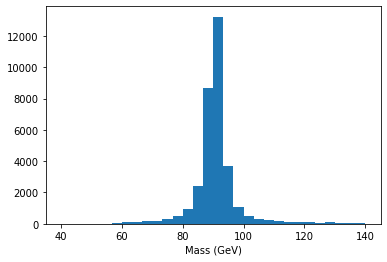

In [15]:
import matplotlib.pyplot as plt

hist1.plot(histtype = "fill")
plt.show()

**Done**

Well done!

If everything went well, you have just reconstructed the $Z^0$ boson!

*Interpret this graph - what is the mass of this boson?*

<details>
    <summary>Answer: </summary>
        That's right - 90 GeV!
</details>

[Return to contents](#c)

---

## Over to you! To four leptons <a name="5."></a>

We have a theory that a more complicated interaction occurs between a quark, $q$, and an antiquark, $\bar{q}$. We think that they come towards each other, and quickly exchange a particle (the vertical line below). When this happens, the quark and antiquarks turn into $Z^0$s, which then decay themselves, exactly as in the last analysis. Notice that the part of the Feynman diagram within the box is exactly the same as the diagram above!

<CENTER><img src="images/2z4l_boxed.png" style="width:30%"></CENTER>

Does this decay really happen? Let's find out, using some new data. We are going to apply some cuts then see if the plots that we produce still make sense. We are not trying to just confirm what the mass of the $Z^0$ boson is, as we did that above - we just want to see if this kind of decay can happen, and the best way to do that is see if the plots look like what we expect them to look like!

*We can't reconstruct the 4-momenta of the quarks, or the exchanged particle - why?*

Therefore, we just look at the final state. We are going to work out the masses of both $Z^0$s in these events.

We have a lot more particles to keep track of this time, so the event will be less clean.

Tips:

* You will need to add some cuts: what will these cuts be?
* How do you pick which lepton came from which $Z^0$. Can you tell at all, or do you try each possible way?
* How many ways are there of reconstructing wrongly? How can you tell if you've reconstructed correctly - what else can you cut on?

__Remember, there are two sub-decays here. You could try checking if one of them is a good decay (a real $Z^0$ decaying to two leptons), and then only plotting the mass of the other one if it is.__


### First load your tree and set up you histogram canvas

#### File and plot details

- Name: `https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/MC/mc_363490.llll.4lep.root`
- TTree name: `mini
hist1 = Hist(hist.axis.Regular(30,40,140, label = "Mass (GeV)"))
- Histogram:
    - name: `"hist_Zl4"`
    - nBins: 30
    - min: 40
    - max: 140
    - label: "Mass (GeV)"
    - title: "Mass of the Z boson from 4-lepton events"

In [ ]:
# Exactly the same as before, using the details in the cell below
# We've renamed the variables to avoid overwriting the old ones, so that you can run them again.

f_4l = #### ## 4 lepton 13 TeV sample
tree = ####
tree.show()

#hist_Zl4 = ####

### Next, perform your analysis

In [ ]:
#Answer
# Declare four TLorentzVectors
firstLepton  = ####
secondLepton = ####
thirdLepton = ####
fourthLepton = ####

sel_events = f_4l.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])

# Now, iterate through each event in the tree!
for event in ####:
    # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
    lep_n = event["lep_n"]
    if #### >= 4:
        
        # Cut #2: First two leptons must have opposite charge.
        lep_charge = event["lep_charge"]
        if (lep_charge[0] != ####):
            
            # Cut #3: First two leptons must have same flavour
            lep_type = event["lep_type"]
            if ( lep_type[0] == ####):
                
                lep_pt = event["lep_pt"]
                lep_eta = event["lep_eta"]
                lep_phi = event["lep_phi"]
                lep_E = event["lep_E"]
                
                firstLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                secondLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                
                # Could we add a cut in here? 

                # Now we look at the second decay - note that we have assumed that the first two
                # Cut #4: Second two leptons opposite charge
                if (lep_charge[2] != ####):

                    # Cut #5:
                    if ( lep_type[2] == ####):
                        # By now we should only have paricles that look right remaining.
                        
                        # Let's set the components of a TLorentzVector for each lepton. Notice that the energy and momenta are given in MeV!
                        thirdLepton.SetPtEtaPhiE(lep_pt[2]/1000., lep_eta[2], lep_phi[2], lep_E[2]/1000.)
                        fourthLepton.SetPtEtaPhiE(lep_pt[3]/1000., lep_eta[3], lep_phi[3], lep_E[3]/1000.)
                        
                        # Now, reconstruct the Z0 boson Lorentz vector! 
                        Z0_boson1 = #### + ####
                        Z0_boson2 = #### + ####

                        # And chuck this particular value into the histogram.
                        hist_Zl4.fill(Z0_boson1.M())
                        hist_Zl4.fill(Z0_boson2.M())


#### Some hints to help you - Click to reveal

<details>
    <summary>a) Declare four TLorentzVectors. </summary>

    firstLepton  = TLorentzVector()
    secondLepton = TLorentzVector()
    thirdLepton  = TLorentzVector()
    fourthLepton = TLorentzVector()
</details>

<details>
    <summary> b) Now, iterate through each event in the tree </summary>
    
    for x in y:
    
    (x is event and y is the array of events) 
</details>

<details>
    <summary>c) Cut #1: At least 4 leptons in the event. </summary>
    
    if lep_n >= 4:
</details>

<details>
    <summary>d) Cut #2: First two leptons must have opposite charge. </summary>
    
    if (lep_charge[0] != lep_charge[1]):
</details>

<details>
    <summary>e) Cut #3: First two leptons must have same flavour. </summary>
    
    if ( lep_type[0] == lep_type[1]):
</details>

<details>
    <summary>f) Cut #4 and Cut #5: Second two leptons opposite charge, same flavour. </summary>
    
    if (lep_charge[2] != lep_charge[3]):
    if (lep_type[2] == lep_type[3]):
</details>

<details>
    <summary>g) Now, reconstruct the Z0 boson Lorentz vectors. </summary>
    
    Z0_boson1 = firstLepton + secondLepton
    Z0_boson2 = thirdLepton + fourthLepton
</details>

<details>
    <summary> --> If you're REALLY stuck... the full solution: </summary>

#Answer
# Declare four TLorentzVectors
firstLepton  = TLorentzVector()
secondLepton = TLorentzVector()
thirdLepton = TLorentzVector()
fourthLepton = TLorentzVector()

sel_events = f_4l.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])

# Now, iterate through each event in the tree!
for event in sel_events:
    # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
    lep_n = event["lep_n"]
    if lep_n >= 4:
        
        # Cut #2: First two leptons must have opposite charge.
        lep_charge = event["lep_charge"]
        if (lep_charge[0] != lep_charge[1]):
            
            # Cut #3: First two leptons must have same flavour
            lep_type = event["lep_type"]
            if ( lep_type[0] == lep_type[1]):
                
                lep_pt = event["lep_pt"]
                lep_eta = event["lep_eta"]
                lep_phi = event["lep_phi"]
                lep_E = event["lep_E"]
                
                firstLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                secondLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                
                # Could we add a cut in here? 

                # Now we look at the second decay - note that we have assumed that the first two
                # Cut #4: Second two leptons opposite charge
                if (lep_charge[2] != lep_charge[3]):

                    # Cut #5:
                    if ( lep_type[2] == lep_type[3]):
                        # By now we should only have paricles that look right remaining.
                        
                        # Let's set the components of a TLorentzVector for each lepton. Notice that the energy and momenta are given in MeV!
                        thirdLepton.SetPtEtaPhiE(lep_pt[2]/1000., lep_eta[2], lep_phi[2], lep_E[2]/1000.)
                        fourthLepton.SetPtEtaPhiE(lep_pt[3]/1000., lep_eta[3], lep_phi[3], lep_E[3]/1000.)
                        
                        # Now, reconstruct the Z0 boson Lorentz vector! 
                        Z0_boson1 = firstLepton + secondLepton
                        Z0_boson2 = thirdLepton + fourthLepton

                        # And chuck this particular value into the histogram.
                        hist_Zl4.fill(Z0_boson1.M())
                        hist_Zl4.fill(Z0_boson2.M())
        
</details>

### Finally, plot your results

In [ ]:
hist_Zl4.plot(histtype = "fill")
plt.show()

[Return to contents](#c)

---

# Real experiments <a name="c"></a>

Now, real experiments are not run like this. You may have noticed that although we mentioned a theoretical decay, all we gave you was a diagram. You had no real way of checking whether or not the decay that the theory described is actually what happens in reality, other than saying that the plots look roughly about right.

So, one more thing. Surprise! The data you have been analysing here isn't really data at all - it is in fact a simulated sample of $Z^0 \rightarrow \ell\bar{\ell}$ and $Z^0 Z^0 \rightarrow \ell\bar{\ell}\ell\bar{\ell}$ decays in the ATLAS detector, based on the Standard Model.

The way we perform actual experiments, is that we write some analysis code, just like above, and then run the exact same code on a Standard Model simulation and on the real data that gets spat out by the detector. The extent to which the two agree then tells us how close our model is to reality.

Here’s an example of what happens if we compare the simulation with what we see at the LHC. The black dots are the real data, and the bars are real data. You may notice that it looks pretty close to what we had before - that's because there are lots and lots of Z decays that happen in the detector. If you looked closely enough, you would be able to tell that there are other colours stacked there in the histogram, but the slices are so thin that you can't see them.

<CENTER><img src="images/Zinvmass-ATLASOD8TeV.png" style="width:50%"></CENTER>


[Return to contents](#c)

---

## Extension exercises <a name="7."></a>

a) The way we performed our 4 lepton analysis was not optimal - we ended up selecting many fewer events than actually happened.

- What was the problem with our analysis? 

- Can you think of a better way? Redo the analysis your way and compare the results

<details>
    <summary>Click for a hint: </summary>
    In our version of the analysis we only kept an event if its first two leptons looked like one Z-boson, and its second two leptons looked like another. Is this the only combination we could have chosen?
</details>

b) An example of a file with real data events containing four leptons is `"https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root` (with more available in that folder).

- Choose one of the analyses above ($Z\rightarrow ll$ or $ZZ\rightarrow llll$) and repeat using real data instead of simulation
- Do your plots look the same?

c) To perform our analysis, we imposed some basic cuts to try select good Z boson candidates, however, in practice real measurements impose more! 

- Look at the branches available in your TTrees, and their explanation in the [ATLAS Open Data Documentation](http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html) to try come up with some more cuts.
- Repeat the analysis and compare your plots:
    - How are they different?
    - Which one would be considered a 'better measurement' and why?

[Return to contents](#c)

---